In [81]:
%load_ext autoreload

%autoreload 2

from __future__ import division, print_function

from glob import glob
import os
import time
import cPickle as pickle
import joblib

import scipy.linalg
import scipy.stats

import emcee
import numdifftools

import kepler
import threebody

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 144
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.viridis()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [195]:
# Note: bad things happen if any TOAs are too close to zero.
start = 1
end = 2000
density = 20 # TOAs per day
#fakename = "fake_short"
#fakename = "fake_noSR"
#fakename = "fake_noSR_noGR"
fakename = "fake_delta"

toa_infos = [ dict(file="FAKE",
                   freq=999999.999,
                   mjd_string=repr(F.base_mjd+t),
                   uncert=1.0, # us
                   tel="@",
                   flags=dict(tel="fake",
                              band=999999)) 
             for t in np.linspace(start,end,int((end-start)*density),dtype=np.longdouble)]

threebody.write_t2_toas(fakename+".tim", toa_infos)

In [196]:
fpickle = "forecaster_params.pickle"
fparams = "forecaster_best_parameters.pickle"
f_best_params = pickle.load(open(fparams, "rb"))
f_best_params["delta"] = 1e-4
d = pickle.load(open(fpickle,"rb"))
#d["special"] = False
#d["general"] = False
d["ppn_mode"] = "heavysimple"
d["files"] = fakename
d["toa_mode"] = "pipeline"
F = threebody.Fitter(**d)
F.best_parameters = f_best_params.copy()
d

{'efac': 1,
 'fdn_range': (1, 5),
 'files': 'fake_delta',
 'fit_pm': True,
 'fit_pos': True,
 'fit_px': True,
 'general': True,
 'kopeikin': False,
 'linear_dm': True,
 'linear_jumps': True,
 'matrix_mode': 0,
 'only_tels': None,
 'parfile': '0337_tempo2_px_optical_dmcorr.par',
 'ppn_mode': 'heavysimple',
 'priors': ('dbeta', 'dgamma'),
 'reference_f0': 365.95336876828094,
 'shapiro': True,
 'special': True,
 't2_astrometry': True,
 'toa_mode': 'pipeline',
 'tol': 1e-16,
 'tzrmjd_middle': 'auto',
 'use_quad': False}

In [197]:
for t in F.jnames:
    if t not in F.best_parameters:
        print(t)
        F.best_parameters[t] = 0

In [198]:
if F.pulses is None:
    F.pulses = np.zeros(len(F.mjds),dtype=np.int64)

In [199]:
r = F.residuals(F.best_parameters, linear_fit=False)


In [200]:
F.pulses += np.round(r).astype(np.int64)

In [201]:
r = F.residuals(F.best_parameters, linear_fit=False)


(array([ 4027.,  3999.,  4032.,  3990.,  4009.,  4085.,  3859.,  3956.,
         4033.,  3990.]),
 array([-0.49999403, -0.39999685, -0.29999967, -0.2000025, -0.10000532,
        -8.1423204e-06,  0.099989035,  0.19998621,  0.29998339,  0.39998057,
         0.49997774], dtype=float128),
 <a list of 10 Patch objects>)

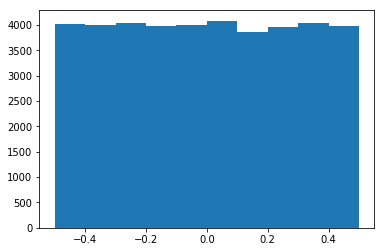

In [202]:
plt.hist(r)

In [203]:
for t, p, m, ri in zip(toa_infos, F.pulses, F.mjds, r):
    t["flags"]["pn"] = p
    mjd_string = repr(F.base_mjd + m - ri/F.reference_f0/86400)
    #print(t["mjd_string"], mjd_string)
    t["mjd_string"] = mjd_string
    
threebody.write_t2_toas(fakename+".tim", toa_infos)

In [204]:
F = threebody.Fitter(**d)
F.best_parameters = f_best_params.copy()
d

{'efac': 1,
 'fdn_range': (1, 5),
 'files': 'fake_delta',
 'fit_pm': True,
 'fit_pos': True,
 'fit_px': True,
 'general': True,
 'kopeikin': False,
 'linear_dm': True,
 'linear_jumps': True,
 'matrix_mode': 0,
 'only_tels': None,
 'parfile': '0337_tempo2_px_optical_dmcorr.par',
 'ppn_mode': 'heavysimple',
 'priors': ('dbeta', 'dgamma'),
 'reference_f0': 365.95336876828094,
 'shapiro': True,
 'special': True,
 't2_astrometry': True,
 'toa_mode': 'pipeline',
 'tol': 1e-16,
 'tzrmjd_middle': 'auto',
 'use_quad': False}

(array([   393.,   1287.,   3049.,   5235.,  10275.,   9889.,   5217.,
          2981.,   1299.,    355.]),
 array([-3.4961849e-05, -2.7945265e-05, -2.0928681e-05, -1.3912097e-05,
        -6.8955123e-06,  1.2107193e-07,  7.1376562e-06,  1.415424e-05,
         2.1170825e-05,  2.8187409e-05,  3.5203993e-05], dtype=float128),
 <a list of 10 Patch objects>)

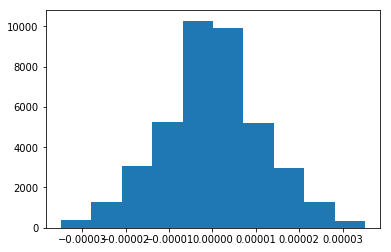

In [205]:
r = F.residuals(F.best_parameters, linear_fit=False)
plt.hist(r)

In [206]:
for t, m, ri in zip(toa_infos, F.mjds, r):
    mjd_string = repr(F.base_mjd + m - ri/F.reference_f0/86400)
    #print(t["mjd_string"], mjd_string)
    t["mjd_string"] = mjd_string
    
threebody.write_t2_toas(fakename+".tim", toa_infos)

In [207]:
F = threebody.Fitter(**d)
F.best_parameters = f_best_params.copy()
d

{'efac': 1,
 'fdn_range': (1, 5),
 'files': 'fake_delta',
 'fit_pm': True,
 'fit_pos': True,
 'fit_px': True,
 'general': True,
 'kopeikin': False,
 'linear_dm': True,
 'linear_jumps': True,
 'matrix_mode': 0,
 'only_tels': None,
 'parfile': '0337_tempo2_px_optical_dmcorr.par',
 'ppn_mode': 'heavysimple',
 'priors': ('dbeta', 'dgamma'),
 'reference_f0': 365.95336876828094,
 'shapiro': True,
 'special': True,
 't2_astrometry': True,
 'toa_mode': 'pipeline',
 'tol': 1e-16,
 'tzrmjd_middle': 'auto',
 'use_quad': False}

(array([  110.,  1671.,  4746.,  6334.,  6462.,  6631.,  6629.,  5125.,
         2051.,   221.]),
 array([-9.3132257e-08, -7.469207e-08, -5.6251884e-08, -3.7811697e-08,
        -1.937151e-08, -9.3132257e-10,  1.7508864e-08,  3.5949051e-08,
         5.4389238e-08,  7.2829425e-08,  9.1269612e-08], dtype=float128),
 <a list of 10 Patch objects>)

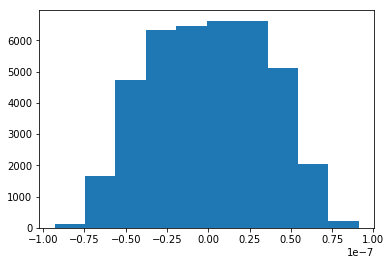

In [208]:
r = F.residuals(F.best_parameters, linear_fit=False)
plt.hist(r)

In [209]:
F.goodness_of_fit()

0.00036989655778338082581

In [210]:
bpd = threebody.load_best_parameter_database()
F2 = threebody.Fitter(**d)
newp = F.best_parameters.copy()

old = F2.goodness_of_fit()
print(old)
new = F2.goodness_of_fit(newp)
print(new)
if new<old:
    print("updating")
    bpd[F2.bpd_k] = newp
threebody.save_best_parameter_database(bpd)

inf
0.000369896557783
updating


In [211]:
d2 = d.copy()
d2["ppn_mode"] = "heavysimple"
bpd = threebody.load_best_parameter_database()
F2 = threebody.Fitter(**d2)
newp = F.best_parameters.copy()
for p in ['delta','dbeta','dgamma']:
    if p not in newp:
        print("Adding",p)
        newp[p] = 0

old = F2.goodness_of_fit()
print(old)
new = F2.goodness_of_fit(newp)
print(new)
if new<=old:
    print("updating")
    bpd[F2.bpd_k] = newp
threebody.save_best_parameter_database(bpd)

Adding dbeta
Adding dgamma
0.000369896557783
0.000369896557783
updating
